In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
from myst_nb import glue
import warnings
warnings.filterwarnings("ignore")

## Density and CDF ##

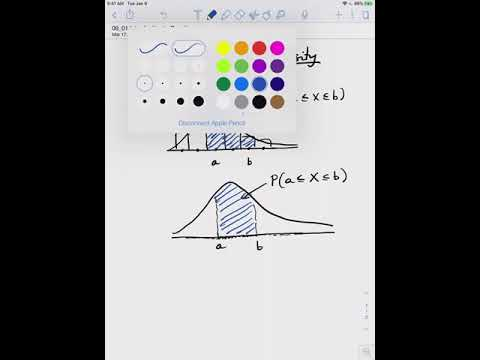

In [2]:
# VIDEO: Introduction to Density
from IPython.display import YouTubeVideo

vid_intro_dense = YouTubeVideo('YU3ShHl3wE8')
glue("vid_intro_dense", vid_intro_dense)

```{dropdown} See More
:icon: video
{glue:}`vid_intro_dense`
```

Let $f$ be a non-negative function on the real number line and suppose 

$$
\int_{-\infty}^\infty f(x)dx ~ = 1
$$

Then $f$ is called a *probability density function* or just *density* for short.

In the next section we will discuss the reason behind the name. For now, imagine the graph of $f$ as a kind of continuous probability histogram. We will soon make that precise, but notice that by definition the total area under a density curve has to be 1.

```{admonition} Quick Check
Consider the function $f(x) = \frac{1}{2}x$ for $0 < x < 2$ and $f(x) = 0$ elsewhere. Explain why $f$ is a probability density. [It is quicker to use geometry than calculus.]

```

```{admonition} Answer
:class: dropdown
Non-negative, total area under the graph is 1

```

As an example, the function $f$ defined by

$$
f(x) = 
\begin{cases}
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \le 0 \\
6x(1-x) ~~~~~ \text{if } 0 < x < 1 \\
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \ge 1 \\
\end{cases}
$$

is a density. It is easy to check by calculus that it integrates to 1. 

**Note:** The calculus used in this text is very straightforward. You should be able to do it easily by hand. Later in this chapter we will give you some Python tools for calculus. We will also show how understanding probability can help us do calculus quickly.

Here is a graph of the function $f$. The density puts all the probability on the unit interval.

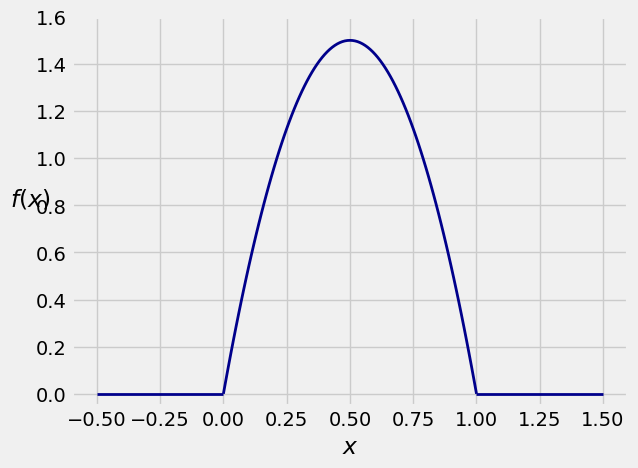

In [3]:
# NO CODE

def f(x):
    return 6*x*(1-x)

x = np.arange(0, 1.01, 0.01)
plt.plot(x, f(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.ylim(-0.05, 1.6)
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0);

### Density is Not the Same as Probability ###
In the example above, $f(0.5) = 6/4 = 1.5 > 1$. Indeed, there are many values of $x$ for which $f(x) > 1$. So the values of $f$ are clearly not probabilities.

Then what are they? We'll study that in the next section. In this section we will see that we can work with densities just as we did with the normal curve.

First, a labor-saving device: If $f$ is positive only on a subinterval of the line, then usually we will just write its definition on the interval where it is positive. It will be assumed to be 0 elsewhere.

$$
f(x) ~ = ~ 6x(1-x), ~~~ 0 < x < 1
$$

And we will draw the graph of $f$ only over the region where it is positive:

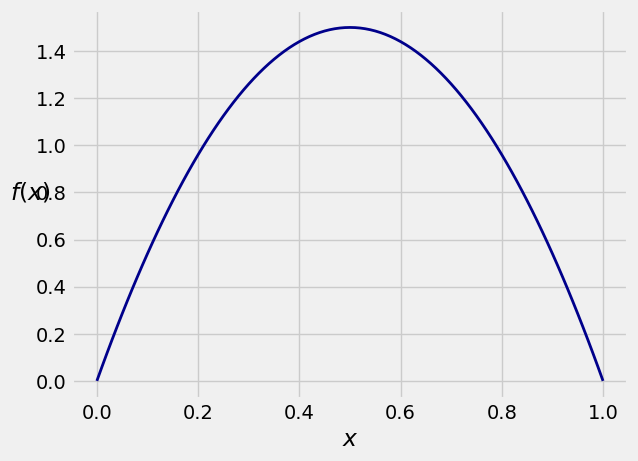

In [4]:
# NO CODE 

plt.plot(x, f(x), color='darkblue', lw=2)
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0);

### Areas are Probabilities ###
A random variable $X$ is said to *have density $f$* if for every pair $a < b$,

$$
P(a < X \le b) ~ = ~ \int_a^b f(x)dx
$$

This integral is the area between $a$ and $b$ under the density curve. The graph below shows the area corresponding to $P(0.6 < X \le 0.8)$ for a random variable $X$ that has the density in our example.

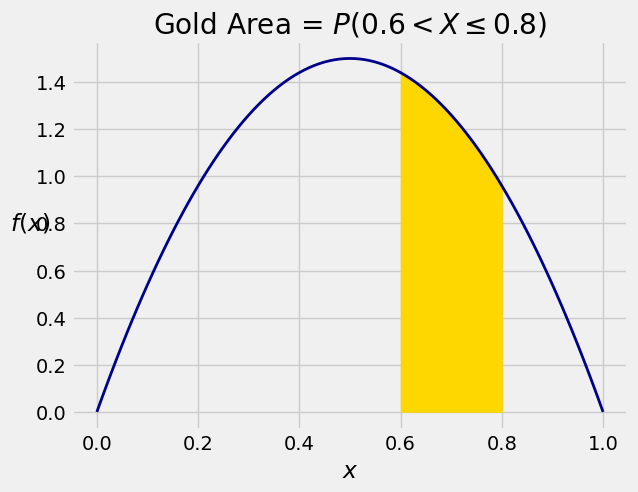

In [5]:
# NO CODE
plt.plot(x, f(x), color='darkblue', lw=2)
w = np.arange(0.6, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title('Gold Area = $P(0.6 < X \leq 0.8)$');

The area is

$$
P(0.6 < X \le 0.8) ~ = ~ \int_{0.6}^{0.8} 6x(1-x)dx ~ = ~ 0.248
$$

```{admonition} Quick Check
Let $X$ have density $f$ given by $f(x) = \frac{1}{2}x$ for $0 < x < 2$ and $f(x) = 0$ elsewhere. Find $P(X > 1)$.

```

```{admonition} Answer
:class: dropdown
$0.75$

```

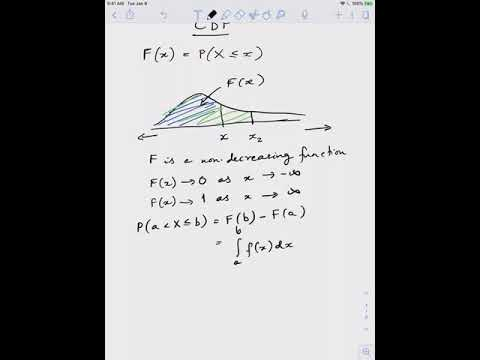

In [6]:
# VIDEO: CDF
vid_cdf_intro = YouTubeVideo('heahvMpBU_E')
glue("vid_cdf_intro", vid_cdf_intro)

```{dropdown} See More
:icon: video
{glue:}`vid_cdf_intro`
```

### Cumulative Distribution Function (CDF) ###
The cdf of $X$ is the function $F$ defined by

$$
F(x) ~ = ~ P(X \le x) ~ = ~ \int_{-\infty}^x f(s)ds
$$

You are already familiar with the definition $F(x) = P(X \le x)$. What's new is that we can compute the probability by integrating the density function.

In our example, the only possible values of the random variable $X$ are between 0 and 1, so $F(x) = 0$ for $x \le 0$ and $F(x) = 1$ for $x \ge 1$.
For $x$ between 0 and 1,

$$
F(x) ~ = ~ \int_0^x 6s(1-s)ds ~ = ~ 3x^2 - 2x^3
$$

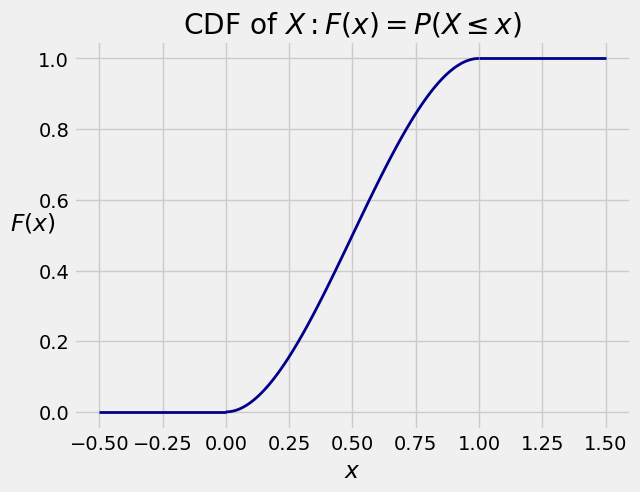

In [7]:
# NO CODE

def F(x):
    return 3*x**2 - 2*x**3

x = np.arange(0, 1.01, 0.01)
plt.plot(x, F(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [1, 1], color='darkblue', lw=2)
plt.ylim(-0.05, 1.05)
plt.xlabel('$x$')
plt.ylabel('$F(x)$', rotation=0)
plt.title('CDF of $X: F(x) = P(X \leq x)$');

In terms of the graph of the density, $F(x)$ is all the area to the left of $x$ under the density curve. The graph below shows the area corresponding to $F(0.8)$.

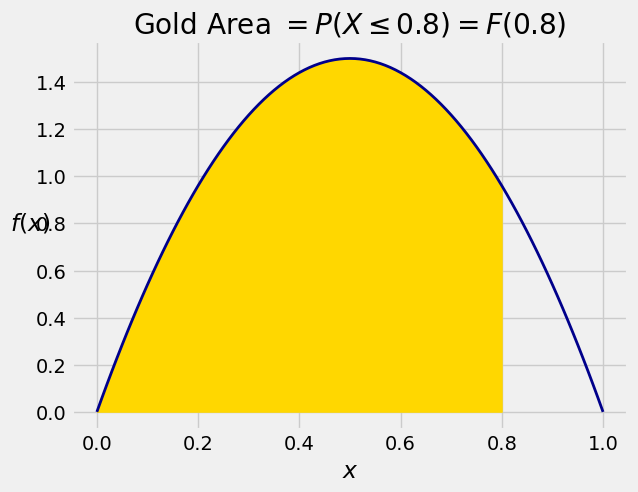

In [8]:
# NO CODE

plt.plot(x, f(x), color='darkblue', lw=2)
w = np.arange(0, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title('Gold Area $= P(X \leq 0.8) = F(0.8)$');

$$
P(X \le 0.8) ~ = ~  F(0.8) ~ = ~ 3\cdot0.8^2 - 2\cdot0.8^3 ~ = ~ 0.896
$$

As before, the cdf can be used to find probabilities of intervals. For every pair $a < b$,

$$
P(a < X \le b) ~ = ~ F(b) - F(a) 
$$

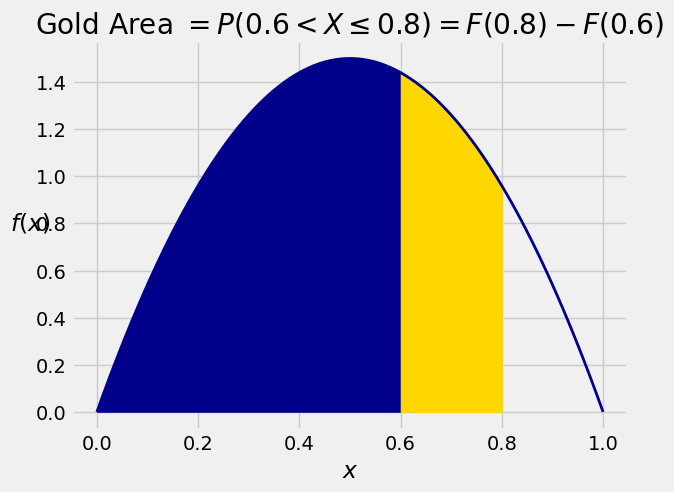

In [9]:
# NO CODE 

plt.plot(x, f(x), color='darkblue', lw=2)
w = np.arange(0, 0.601, 0.01)
plt.fill_between(w, f(w), color='darkblue')
w = np.arange(0.6, 0.801, 0.01)
plt.fill_between(w, f(w), color='gold')
plt.xlabel('$x$')
plt.ylabel('$f(x)$', rotation=0)
plt.title('Gold Area $= P(0.6 < X \leq 0.8) = F(0.8) - F(0.6)$');

$$
\begin{align*}
F(0.6) ~ &= ~ 3\cdot0.6^2 - 2\cdot0.6^3 ~ = ~ 0.648 \\
F(0.8) - F(0.6) ~ &= ~ 0.896 - 0.648 ~ = ~ 0.248
\end{align*}
$$

That's the same as the answer we got earlier in the section by integrating the density between 0.6 and 0.8.

By the Fundamental Theorem of Calculus, the density and cdf can be derived from each other:

$$
F(x) = \int_{-\infty}^x f(s)ds ~~~~~~~~~~~~~~~~~~ f(x) = \frac{d}{dx}F(x)
$$

You can use whichever of the two functions is more convenient in a particular application.

Also keep in mind that every cdf $F$ satisfies some basic properties:

- $F(x) \to 0$ as $x \to -\infty$
- $F$ is non-decreasing
- $F(x) \to 1$ as $x \to \infty$